### K-Means Procedure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [19]:
values_3d = np.random.rand(40,3)

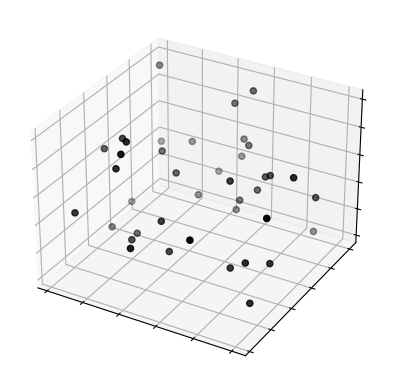

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.scatter(values_3d[:,0],values_3d[:,1],values_3d[:,2], c='k')
plt.savefig('Plots/Cluster Centroids 3D', dpi=600)
plt.show()

In [23]:
values_2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(values_3d)

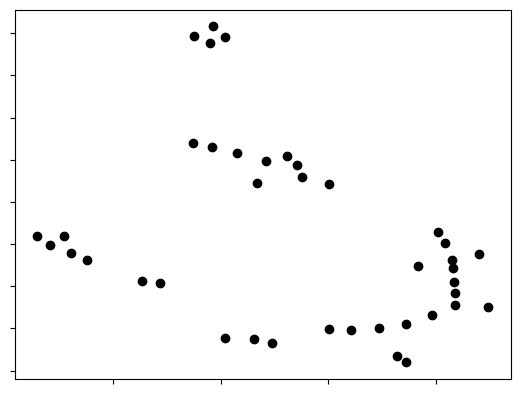

In [32]:
fig, ax = plt.subplots()

ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_zticklabels([])

ax.scatter(values_2d[:,0],values_2d[:,1], c='k')
plt.savefig('Plots/Cluster Centroids 2D', dpi=600)
plt.show()

### K-Means representative clusters 

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('neural_network_data/train_labels_pp_balanced_RTC6.csv')
data

image_name  label         P     speed     x_dir     y_dir  \
0       Base_1428.png      0  0.188181  0.540516  1.427518 -0.022447   
1       MPA_13944.png      0  0.817640  0.539909 -1.400466 -0.001226   
2      Base_17491.png      0  0.188181 -0.217977 -1.400151  0.028609   
3       Base_7028.png      0  0.189238  0.539909 -1.400466 -0.001226   
4       MPA_13167.png      0 -0.061699  0.573639 -1.400466 -0.001226   
...               ...    ...       ...       ...       ...       ...   
67921    MPA_8211.png      5 -0.150867 -1.888627  0.013606 -1.416120   
67922    MPA_9965.png      5 -4.681844 -2.495761  0.013606 -1.416120   
67923  Base_18743.png      5  0.189238  0.533370  1.013505 -1.001707   
67924   MPA_17087.png      5  1.498555 -0.431505  1.427677 -0.001226   
67925   MPA_13368.png      5  0.194525 -0.740022  1.415474 -0.186705   

          accel        ed  heating  turning  res_heat  
0     -0.023947 -0.406395       -1        0 -1.501679  
1      0.186455 -0.209000        1        0  0.877147  
2     -0.656276  0.029320       -1        0  1.816994  
3     -0.004820 -0.405764       -1        0 -0.743633  
4      0.186455 -0.500405        1        0  0.569853  
...         ...       ...      ...      ...       ...  
67921  0.186455  1.581406        1        0 -0.338105  
67922  0.569003 -0.465025       -1        0  0.805251  
67923  0.265683 -0.402531        0        0  1.252092  
67924  0.262964  0.679291        1        0  0.647609  
67925 -5.574809  0.425091        1        1  0.052420  

[67926 rows x 11 columns]

In [4]:
labels = np.array(data['label'])
labels

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

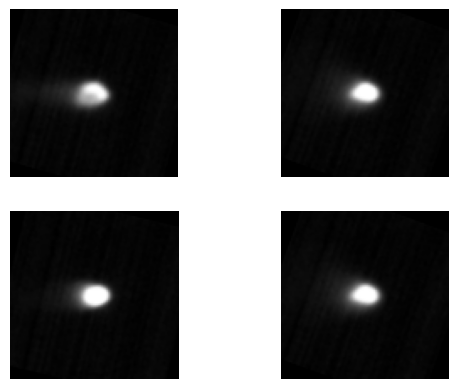

In [61]:
MELT_POOL_CLASS = 23

indx = np.where(labels == MELT_POOL_CLASS)[0]
image_names = np.array(data['image_name'])[indx]
total_images = len(image_names)
selected_img_indx = np.random.randint(0,total_images,4)
selected_img_name = image_names[selected_img_indx]

fig, ax = plt.subplots(2,2)

x = 0
y = 0
for name in selected_img_name:
    layer_num = name[:name.find('_')]
#     full_img_name = '../../Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
    full_img_name = '../../../In-situ Meas Data/In-Situ Meas Data/Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
    image = cv2.imread(full_img_name)
    ax[x, y].imshow(image)
    ax[x, y].axis('off')
    if x == 1:
        x = 0
        y += 1
    else:
        x = 1

plt.savefig('Plots/Clusters/Final/Class' + str(MELT_POOL_CLASS) + '.png', dpi=600)

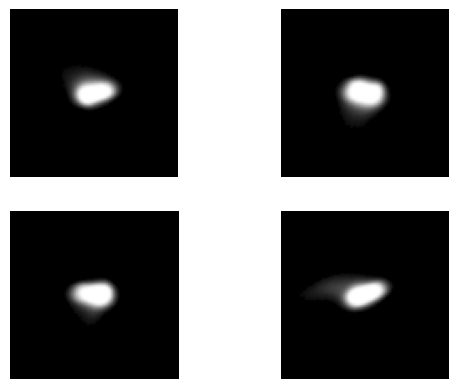

In [29]:
# RTC

MELT_POOL_CLASS = 5

indx = np.where(labels == MELT_POOL_CLASS)[0]
image_names = np.array(data['image_name'])[indx]
total_images = len(image_names)
selected_img_indx = np.random.randint(0,total_images,4)
selected_img_name = image_names[selected_img_indx]

fig, ax = plt.subplots(2,2)

x = 0
y = 0
for name in selected_img_name:
    if name.find('Base') >= 0:
        full_img_name = '../../../RTC_Images/Base/layer1_' + name[5:]
    else:
        full_img_name = '../../../RTC_Images/MPA/layer1_' + name[4:]
    layer_num = name[:name.find('_')]
    image = cv2.imread(full_img_name)
    ax[x, y].imshow(image)
    ax[x, y].axis('off')
    if x == 1:
        x = 0
        y += 1
    else:
        x = 1

plt.savefig('Plots/Clusters/RTC6/Class' + str(MELT_POOL_CLASS) + '.png', dpi=600)

### Scan Strategy Visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
layer2 = pd.read_csv('../../../In-situ Meas Data/Build Command Data/XYPT Commands/T500_3D_Scan_Strategies_fused_layer0002.csv')

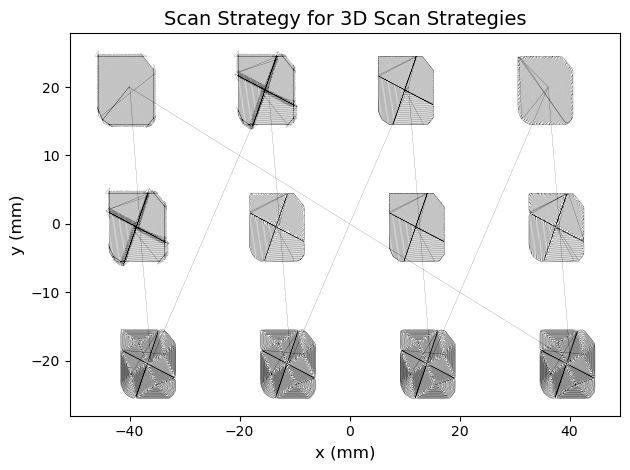

In [58]:
X = layer2['0']
Y = layer2['0.1']
indx = np.arange(0, len(X), 150)
plt.plot(X[indx], Y[indx], linewidth=0.1, c='k')
plt.title('Scan Strategy for 3D Scan Strategies', fontsize=14)
plt.xlabel('x (mm)', fontsize=12)
plt.ylabel('y (mm)', fontsize=12)
plt.tight_layout()
plt.savefig('Plots/3D scan strategies_LowRes.png', dpi=150)
plt.savefig('Plots/3D scan strategies.png', dpi=600)
plt.show()

In [49]:
base = pd.read_csv('../../../RealTimeControl/RTC_XYL_DAQ_IN625_Ar_P01I2000D10_RefA400_Base.csv')

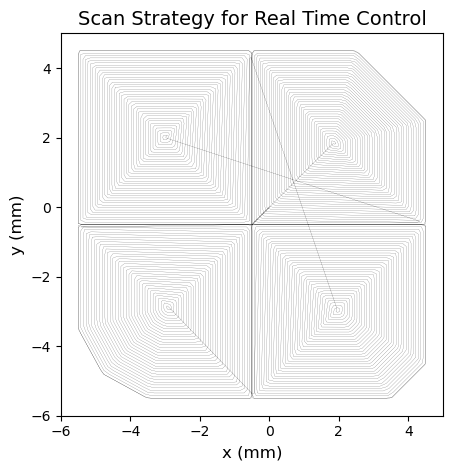

In [59]:
X = base['0']
Y = base['0.1']
indx = np.arange(0, len(X), 25)
plt.plot(X[indx], Y[indx], linewidth=0.1, c='k')
plt.title('Scan Strategy for Real Time Control', fontsize=14)
plt.xlabel('x (mm)', fontsize=12)
plt.ylabel('y (mm)', fontsize=12)
plt.axis('square')
plt.tight_layout()
plt.savefig('Plots/Real Time Control_LowRes.png', dpi=150)
plt.savefig('Plots/Real Time Control.png', dpi=600)
plt.show()